In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from calendar import monthrange

In [151]:
ER_WH_Raw = pd.read_csv("LoadHourlyProfileData/ER_WH_HourlyProfiles.csv", usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
HP_WH_Raw = pd.read_csv("LoadHourlyProfileData/HP_WH_HourlyProfiles.csv", usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
HP_SH_Raw = pd.read_csv("LoadHourlyProfileData/HP_SH_HourlyProfiles.csv", usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [152]:
C1_ER_WH = ER_WH_Raw.loc[:, '1'].to_frame()
C1_HP_WH = HP_WH_Raw.loc[:, '1'].to_frame()

In [153]:
def hours_in_month(month, year):
    return monthrange(year, month)[1] * 24

In [154]:
def hour_bounds_by_month(month, year):
    lower_bound = 0
    for i in range(1, month):
        lower_bound += hours_in_month(i, year)
    upper_bound = lower_bound + hours_in_month(month, year) - 1
    return (lower_bound, upper_bound)

hour_bounds_by_month(1, 2019)

(0, 743)

In [155]:
temp = HP_SH_Raw.loc[0:743, '1'].to_frame()

In [156]:
# find average ER_WH, HP_WH, and HP_SH per month per hour for each climate zone.
def average_ER_WH(month, year, climate):  # pass in month and climate as integers
    assert climate >= 1 and climate <= 16
    assert month >= 1 and month <= 24
    
    first_hour_of_month = hour_bounds_by_month(month, year)[0]
    last_hour_of_month = hour_bounds_by_month(month, year)[1]
    climate_ER_WH = ER_WH_Raw.loc[first_hour_of_month:last_hour_of_month, str(climate)].to_frame()
    
    average_loads = np.zeros(24)
    hour_count = 0
    for i in climate_ER_WH.values:
        if hour_count > 23:
            hour_count = 0
        
        average_loads[hour_count] += i[0]
        hour_count += 1
            
    num_days_in_month = ((last_hour_of_month+1)-first_hour_of_month) / 24
    return np.divide(average_loads, num_days_in_month)

average_ER_WH(1, 2019, 1)

array([0.06835961, 0.        , 0.        , 0.13087252, 0.26772339,
       0.15521184, 0.05297329, 0.61936442, 0.98947394, 0.86205077,
       0.81120645, 0.22747687, 0.19394523, 0.2142181 , 0.12579306,
       0.22832619, 0.23467742, 0.50990032, 0.63488158, 0.49488677,
       0.8008559 , 0.52125616, 0.20737   , 0.        ])

In [157]:
def average_HP_WH(month, year, climate):  # pass in month and climate as integers
    assert climate >= 1 and climate <= 16
    assert month >= 1 and month <= 24
    
    first_hour_of_month = hour_bounds_by_month(month, year)[0]
    last_hour_of_month = hour_bounds_by_month(month, year)[1]
    climate_HP_WH = HP_WH_Raw.loc[first_hour_of_month:last_hour_of_month, str(climate)].to_frame()
    
    average_loads = np.zeros(24)
    hour_count = 0
    for i in climate_HP_WH.values:
        if hour_count > 23:
            hour_count = 0
        
        average_loads[hour_count] += i[0]
        hour_count += 1
            
    num_days_in_month = ((last_hour_of_month+1)-first_hour_of_month) / 24
    return np.divide(average_loads, num_days_in_month)

average_HP_WH(1, 2019, 1)

array([0.07867739, 0.06948677, 0.05053794, 0.10604677, 0.03019768,
       0.05452084, 0.23014384, 0.223172  , 0.15429665, 0.44456319,
       0.37526152, 0.28799242, 0.31655329, 0.31865645, 0.10839439,
       0.10563061, 0.11229197, 0.19366677, 0.10556426, 0.23730123,
       0.40998323, 0.18110742, 0.20123716, 0.14398326])

In [158]:
def average_HP_SH(month, year, climate):  # pass in month and climate as integers
    assert climate >= 1 and climate <= 16
    assert month >= 1 and month <= 24
    
    first_hour_of_month = hour_bounds_by_month(month, year)[0]
    last_hour_of_month = hour_bounds_by_month(month, year)[1]
    climate_HP_SH = HP_SH_Raw.loc[first_hour_of_month:last_hour_of_month, str(climate)].to_frame()
    
    average_loads = np.zeros(24)
    hour_count = 0
    for i in climate_HP_SH.values:
        if hour_count > 23:
            hour_count = 0
        
        average_loads[hour_count] += i[0]
        hour_count += 1
            
    num_days_in_month = ((last_hour_of_month+1)-first_hour_of_month) / 24
    return np.divide(average_loads, num_days_in_month)

average_HP_SH(1, 2019, 1)

array([0.49319121, 0.5404939 , 0.58024375, 0.62854391, 0.63583054,
       0.61966187, 0.59640531, 0.50746643, 0.36827035, 0.28644284,
       0.22278871, 0.16758859, 0.12017975, 0.10169036, 0.0970742 ,
       0.10400976, 0.11740099, 0.14208501, 0.16909744, 0.20164476,
       0.24263122, 0.2933119 , 0.34866074, 0.41645912])

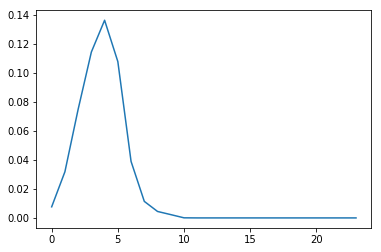

In [192]:
temp = average_HP_SH(7, 2019, 2)
plt.plot(temp)

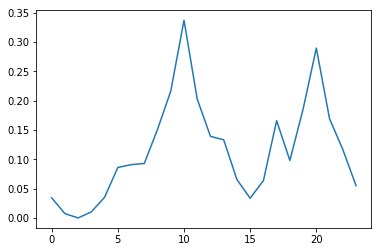

In [196]:
temp = average_HP_WH(1, 2019, 7)
plt.plot(temp)

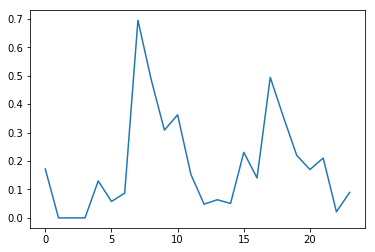

In [195]:
temp = average_ER_WH(5, 2019, 15)
plt.plot(temp)